In [1]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('mode.chained_assignment', 'raise')
pl23 = pd.read_csv('Final.csv')
pl23 = pl23.set_index('Team')
print(pl23)

                   Rank  Unnamed: 2  MP  Won  Drawn  Lost  GF  GA  GD  Points
Team                                                                         
Man City              1         NaN  38   28      5     5  94  33  61      89
Arsenal               2         NaN  38   26      6     6  88  43  45      84
Man Utd               3         NaN  38   23      6     9  58  43  15      75
Newcastle             4         NaN  38   19     14     5  68  33  35      71
Liverpool             5         NaN  38   19     10     9  75  47  28      67
Brighton              6         NaN  38   18      8    12  72  53  19      62
Aston Villa           7         NaN  38   18      7    13  51  46   5      61
Spurs                 8         NaN  38   18      6    14  70  63   7      60
Brentford             9         NaN  38   15     14     9  58  46  12      59
Fulham               10         NaN  38   15      7    16  55  53   2      52
Crystal Palace       11         NaN  38   11     12    15  40  4

In [2]:
def generate_centroids(df, k):
    centroids = df.sample(k).reset_index(drop=True)
    return centroids, centroids.values.tolist()

In [3]:
def calculate_distance(df, centroids_coords):
    names = []
    for i, centroid in enumerate(centroids_coords):
        name = f'dist_centroid_{i}'
        df[name] = np.sqrt((df.iloc[:,0] - centroid[0])**2 + (df.iloc[:,1] - centroid[1])**2)
        names.append(name)
    return df, names

In [4]:
def kmeans(df, xaxis, yaxis, k, loops):
    df = df[[xaxis, yaxis]].copy()
    df['cluster'] = 0
    centroids, coordinates = generate_centroids(df, k)
#     stopIteration = True
    for i in range(loops):
        last_coordinates = coordinates
        df, names = calculate_distance(df, coordinates)
        df['cluster'] = df[names].idxmin(axis=1).str.split('_').str[-1]
        centroids = np.around(df.groupby('cluster')[[xaxis, yaxis]].mean(), 5)
        coordinates = centroids.values.tolist()
        if coordinates == last_coordinates:
            break
    print(f'Total Iterations: {i + 1}')
    
    
#     Plot the graph
    sns.scatterplot(data=centroids, x=xaxis, y=yaxis, color='black', s=150)
    sns.scatterplot(data=df, x=xaxis, y=yaxis, hue='cluster', palette='tab10')
    for team in df.iterrows():
        name = team[0].split(' ')
        abbrv = ''
        if len(name) == 1:
            abbrv = name[0][:3]
        else:
            abbrv = name[0][0] + name[1][0]
        plt.text(team[1][0], team[1][1], abbrv)
    plt.show()
    
    
    return df, centroids

Total Iterations: 3


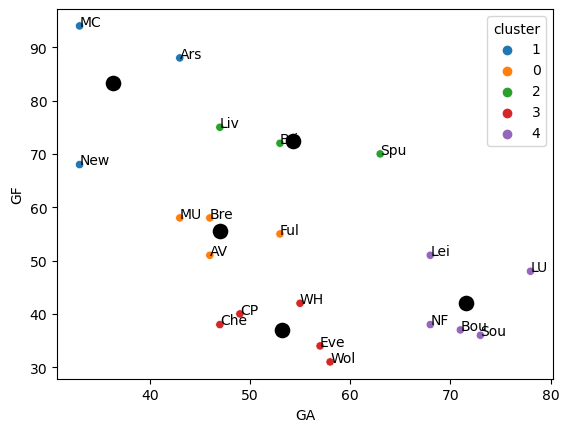

(                   GA  GF cluster  dist_centroid_0  dist_centroid_1  \
 Team                                                                  
 Man City           33  94       1        40.966450        11.175372   
 Arsenal            43  88       1        32.745229         8.137708   
 Man Utd            43  58       0         4.716991        26.195841   
 Newcastle          33  68       1        18.768324        15.691466   
 Liverpool          47  75       2        19.500000        13.535961   
 Brighton           53  72       2        17.557050        20.154956   
 Aston Villa        46  51       0         4.609772        33.747426   
 Spurs              63  70       2        21.592823        29.814241   
 Brentford          46  58       0         2.692582        27.114980   
 Fulham             53  55       0         6.020797        32.871804   
 Crystal Palace     49  40       3        15.628500        45.146672   
 Chelsea            47  38       3        17.500000        46.57

In [5]:
# for i in range(6):
#     df, centroids = 
kmeans(pl23, 'GA', 'GF', 5, 1000)